##Music Genre Classification

Team member names: Shreya Srivastava and Carolene Siga

Data : GTZAN Dataset - Music Genre Classification 
Source : https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/code

Three feature extraction methods used:

1.   MFCC (Manual feature)
2.   PCA 
3.   Delta and double delta for the sample MFCCs (a popular feature extraction method for audio data)
4.   K-Means Clustering

Visualizations included:

1.   MFCCs for the sample audio
2.   PCA on Genres on 2 principal components
3.   BPM Boxplot for Genres
4.   K-Means Clustering
5.   HeatMap *italicized text*

Reference code:

1.   https://www.kaggle.com/code/imsparsh/gtzan-genre-classification-deep-learning-val-92-4/notebook
2.   https://github.com/musikalkemist/DeepLearningForAudioWithPython/blob/master/12-%20Music%20genre%20classification:%20Preparing%20the%20dataset/code/extract_data.py





Data collection

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"srivastavashreya52","key":"059d0f7864b2f7f7b51f40712d818a8e"}') # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip -q gtzan-dataset-music-genre-classification.zipn

Feature extraction

In [ ]:
import os, torch, librosa, sklearn, librosa.display
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import os, torch, librosa, sklearn, librosa.display
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from IPython.display import Audio
from tqdm.auto import tqdm
from scipy.io.wavfile import read
import glob

In [ ]:
paths = glob.glob('/content/Data/genres_original/*')

all_data = []
filenames = []
label = []

spectrum_mean =[]
spectrum_variance = []
spectrum = []

zero_crossings = []
zero_crossings_mean =[]
zero_crossings_var = []

tempo = []

data_mfcc_mean =[]
data_mfcc_var =[]

chroma_stft_mean = []
chroma_stft_var = []

rms_mean = []
rms_var = []

spectral_centroid_mean = []
spectral_centroid_var = []

spectral_bandwidth_mean = []
spectral_bandwidth_var = []

rolloff_mean = []
rolloff_var = []

harmony_mean = []
harmony_var = []

percussive_mean = []
percussive_var = []


for i in paths:
  for filename in glob.glob(os.path.join(i, '*.wav')):
      filename_list = filename.split('/')
      if filename_list[5]== 'jazz.00054.wav':
        continue
      samples, sample_rate = librosa.load(filename)
      data = np.array(samples)
      all_data.append(data)
      label.append((filename.split('/')[-2]))
      filenames.append((filename.split('/')[-1]))

for i in range(len(all_data)):
    spectrum_array = librosa.feature.melspectrogram(S = np.abs(librosa.stft(all_data[i]))**2)
    spectrum.append(spectrum_array)
    spectrum_mean.append(np.mean(spectrum_array))
    spectrum_variance.append(np.var(spectrum_array))

    zero_crossing_array =1*librosa.zero_crossings(all_data[i], pad=False)
    zero_crossings.append(zero_crossing_array)
    zero_crossings_mean.append(np.mean(zero_crossing_array))
    zero_crossings_var.append(np.var(zero_crossing_array))    

    tempo_val = librosa.beat.tempo(y=all_data[i])
    tempo.append(tempo_val[0])
    
    chroma_stft_mean.append(np.mean(librosa.feature.chroma_stft(all_data[i])))
    chroma_stft_var.append(np.var(librosa.feature.chroma_stft(all_data[i])))
    
    rms = librosa.feature.rms(all_data[i])
    rms_mean.append(np.mean(rms))
    rms_var.append(np.var(rms))

    spectral_centroid = librosa.feature.spectral_centroid(all_data[i])
    spectral_centroid_mean.append(np.mean(spectral_centroid))
    spectral_centroid_var.append(np.var(spectral_centroid))

    spectral_bandwidth = librosa.feature.spectral_bandwidth(all_data[i])
    spectral_bandwidth_mean.append(np.mean(spectral_bandwidth))
    spectral_bandwidth_var.append(np.var(spectral_bandwidth))

    rolloff = librosa.feature.spectral_rolloff(all_data[i])
    rolloff_mean.append(np.mean(rolloff))
    rolloff_var.append(np.var(rolloff))

    harmony = librosa.effects.harmonic(all_data[i])
    harmony_mean.append(np.mean(harmony))
    harmony_var.append(np.var(harmony))

    percussive = librosa.effects.percussive(all_data[i])
    percussive_mean.append(np.mean(percussive))
    percussive_var.append(np.var(percussive))


for i in range(len(spectrum)):
    data_mfcc_mean.append(np.mean(librosa.feature.mfcc(np.array(spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    data_mfcc_var.append(np.var(librosa.feature.mfcc(np.array(spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1)) 

mfcc_1_mean = [i[0] for i in data_mfcc_mean]
mfcc_2_mean = [i[1] for i in data_mfcc_mean]
mfcc_3_mean = [i[2] for i in data_mfcc_mean]
mfcc_4_mean = [i[3] for i in data_mfcc_mean]
mfcc_5_mean = [i[4] for i in data_mfcc_mean]
mfcc_6_mean = [i[5] for i in data_mfcc_mean]
mfcc_7_mean = [i[6] for i in data_mfcc_mean]
mfcc_8_mean = [i[7] for i in data_mfcc_mean]
mfcc_9_mean = [i[8] for i in data_mfcc_mean]
mfcc_10_mean = [i[9] for i in data_mfcc_mean]
mfcc_11_mean = [i[10] for i in data_mfcc_mean]
mfcc_12_mean = [i[11] for i in data_mfcc_mean]
mfcc_13_mean = [i[12] for i in data_mfcc_mean]

mfcc_1_var = [i[0] for i in data_mfcc_var]
mfcc_2_var = [i[1] for i in data_mfcc_var]
mfcc_3_var = [i[2] for i in data_mfcc_var]
mfcc_4_var = [i[3] for i in data_mfcc_var]
mfcc_5_var = [i[4] for i in data_mfcc_var]
mfcc_6_var = [i[5] for i in data_mfcc_var]
mfcc_7_var = [i[6] for i in data_mfcc_var]
mfcc_8_var = [i[7] for i in data_mfcc_var]
mfcc_9_var = [i[8] for i in data_mfcc_var]
mfcc_10_var = [i[9] for i in data_mfcc_var]
mfcc_11_var = [i[10] for i in data_mfcc_var]
mfcc_12_var = [i[11] for i in data_mfcc_var]
mfcc_13_var = [i[12] for i in data_mfcc_var]

d = {'filename': filenames, 'label': label,'harmony_mean':harmony_mean, 'harmony_var':harmony_var, 'rolloff_mean':rolloff_mean, 'rolloff_var':rolloff_var, 'spectral_bandwidth_mean':spectral_bandwidth_mean, 'spectral_bandwidth_var':spectral_bandwidth_var, 'spectral_centroid_mean':spectral_centroid_mean, 'spectral_centroid_var':spectral_centroid_var, 'rms_mean':rms_mean, 'rms_var':rms_var, 'chroma_stft_mean':chroma_stft_mean, 'chroma_stft_var':chroma_stft_var, 'percussive_mean':percussive_mean, 'percussive_var':percussive_var,'tempo':tempo, 'spectrum_mean':spectrum_mean,'spectrum_variance':spectrum_variance,'zero_crossings_mean':zero_crossings_mean,'zero_crossings_var':zero_crossings_var, 'mfcc_1_mean':mfcc_1_mean, 'mfcc_2_mean':mfcc_2_mean, 'mfcc_3_mean':mfcc_3_mean, 'mfcc_4_mean':mfcc_4_mean,'mfcc_5_mean':mfcc_5_mean,'mfcc_6_mean':mfcc_6_mean,'mfcc_7_mean':mfcc_7_mean,'mfcc_8_mean':mfcc_8_mean,'mfcc_9_mean':mfcc_9_mean,'mfcc_10_mean':mfcc_10_mean,'mfcc_11_mean':mfcc_11_mean,'mfcc_12_mean':mfcc_12_mean,'mfcc_13_mean':mfcc_13_mean,'mfcc_1_var':mfcc_1_var, 'mfcc_2_var':mfcc_2_var, 'mfcc_3_var':mfcc_3_var, 'mfcc_4_var':mfcc_4_var,'mfcc_5_var':mfcc_5_var,'mfcc_6_var':mfcc_6_var,'mfcc_7_var':mfcc_7_var,'mfcc_8_var':mfcc_8_var,'mfcc_9_var':mfcc_9_var,'mfcc_10_var':mfcc_10_var,'mfcc_11_var':mfcc_11_var,'mfcc_12_var':mfcc_12_var,'mfcc_13_var':mfcc_13_var }

data_df = pd.DataFrame(data=d)

data_df.to_csv(r'/content/drive/MyDrive/EDL Project/dataset_3.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#%cd /content/drive/MyDrive/EDL_Project
%cd /content/drive/MyDrive/EDL Project
!ls

In [ ]:
dataframe = pd.read_csv('dataset_3.csv')
files, labels=  dataframe.filename, dataframe.label

In [ ]:
# Generate an 80-10-10 training, validation and test set split
random_state=0
files_rest, files_test, labels_rest, labels_test = sklearn.model_selection.train_test_split(files, labels, stratify=labels, test_size=0.1, random_state=random_state)
files_train, files_val, labels_train, labels_val = sklearn.model_selection.train_test_split(files_rest, labels_rest, stratify=labels_rest, test_size=0.1/(1 - 0.1), random_state=random_state)
labels = {'train': labels_train, 'val': labels_val, 'test': labels_test}

In [ ]:
# Load the audio using LibROSA\
data_path = '/content/Data'
example_file, example_label = files_train[1], labels_train[1]
example_path = os.path.join(data_path, 'genres_original', example_label, example_file)
example_audio, sample_rate = librosa.load(example_path)
# Audio(example_audio, rate=sample_rate)

Data Visualization

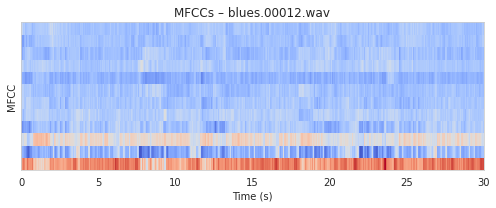

In [ ]:
# Generate and plot the MFCCs for the sample audio
example_mfcc = librosa.feature.mfcc(example_audio, n_mfcc=13)[1:]
fig, ax = plt.subplots(figsize=(7, 3))
librosa.display.specshow(example_mfcc, ax=ax, x_axis='s')
ax.set(title=f'MFCCs – {example_file}', ylabel='MFCC')
plt.tight_layout()
plt.show()

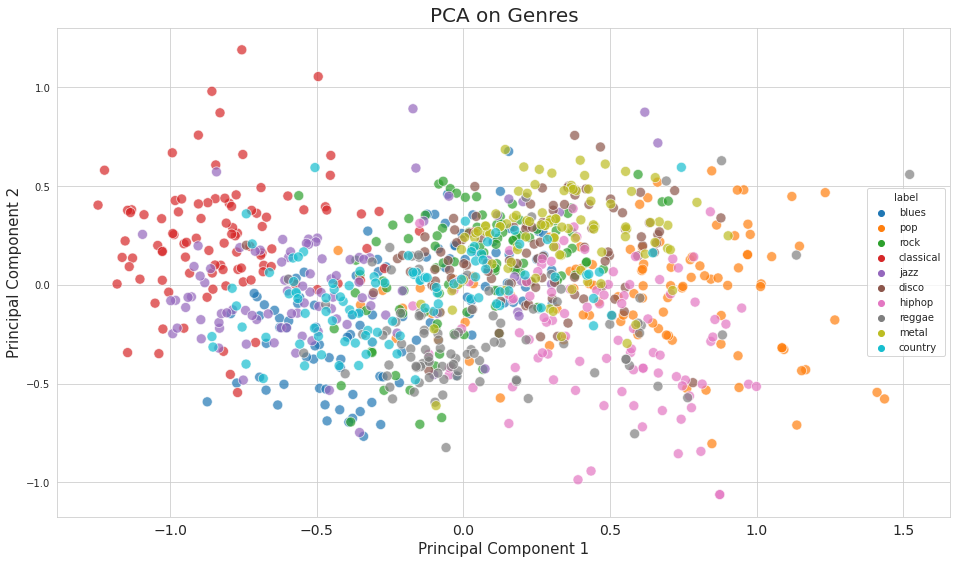

In [ ]:
data = dataframe
y = data['label']
X = data.drop(['label', 'filename'], axis=1)

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
#principalComponents = pca.fit_transform(X)
principalComponents = pca.transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")


In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(X.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pca_importance_df = pd.DataFrame(dic.items())

In [ ]:
pca_importance_df

,0,1
0,PC0,rolloff_mean
1,PC1,zero_crossings_var


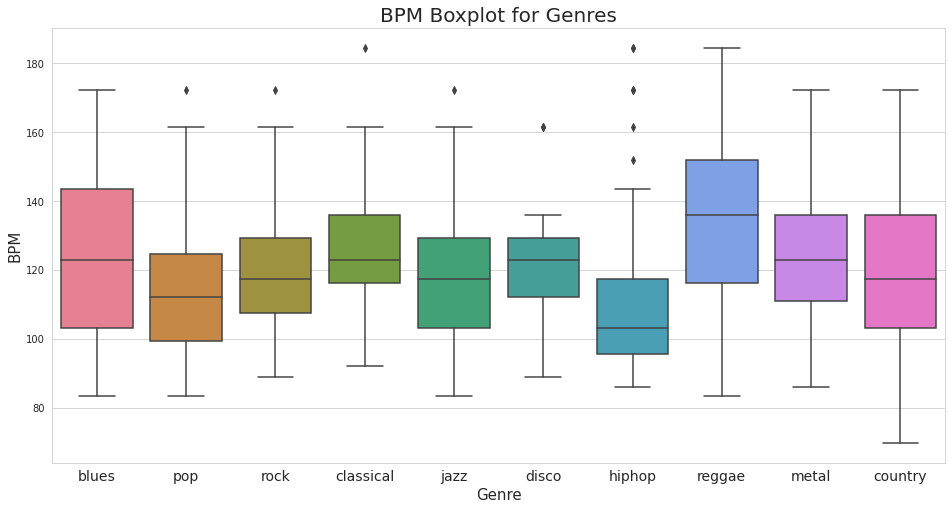

In [ ]:
x = data[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

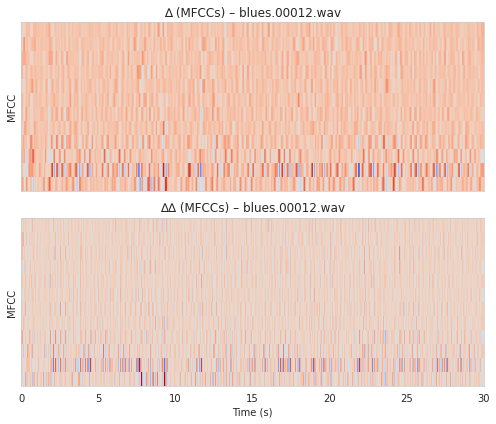

In [ ]:
# Generate ∆ and ∆∆ for the sample MFCCs
example_mfcc_delta = librosa.feature.delta(example_mfcc) 
example_mfcc_delta_delta = librosa.feature.delta(example_mfcc, order=2)

fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

# Plot MFCC ∆s
librosa.display.specshow(example_mfcc_delta, ax=axs[0], x_axis='s')
axs[0].set(title=f'∆ (MFCCs) – {example_file}', xlabel=None, ylabel='MFCC')

# Plot MFCC ∆∆s
librosa.display.specshow(example_mfcc_delta_delta, ax=axs[1], x_axis='s')
axs[1].set(title=f'∆∆ (MFCCs) – {example_file}', ylabel='MFCC')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns).values

kmeans = KMeans(10)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)

Text(0, 0.5, 'zero_crossings_var')

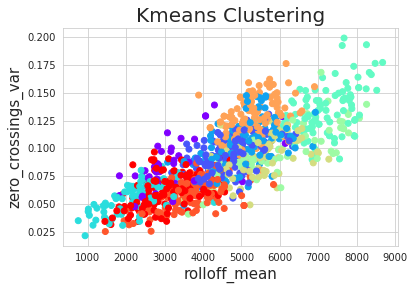

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['rolloff_mean'],data_with_clusters['zero_crossings_var'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.title('Kmeans Clustering', fontsize = 20)
plt.xlabel("rolloff_mean", fontsize = 15)
plt.ylabel("zero_crossings_var", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


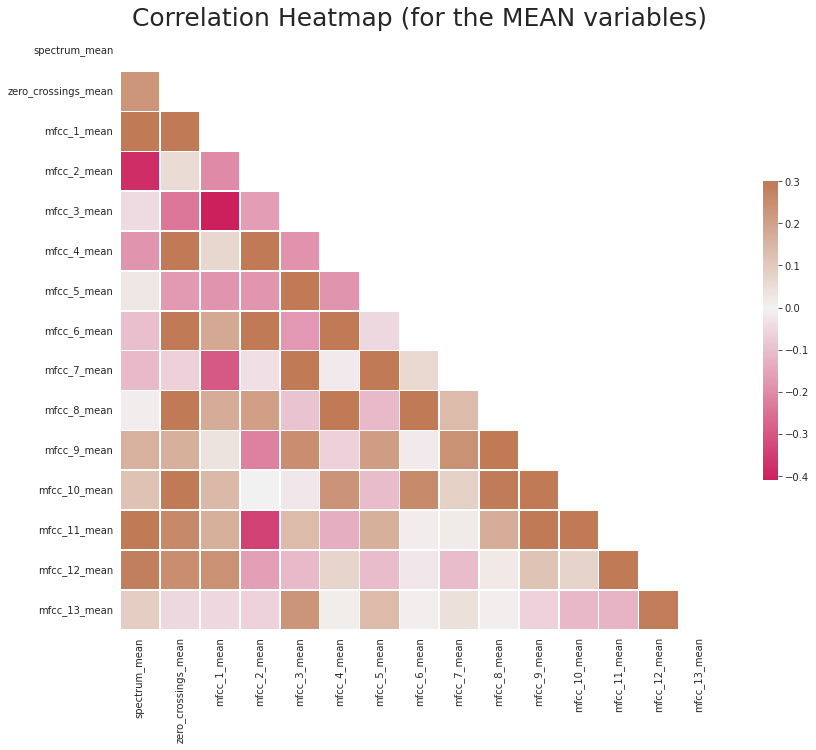

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

Data Pre-Processing

In [ ]:
print("Columns with NA values are",list(dataframe.columns[dataframe.isnull().any()]))

Columns with NA values are []


In [ ]:
label_index = dict()
index_label = dict()
for i, x in enumerate(dataframe.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'pop': 1, 'rock': 2, 'classical': 3, 'jazz': 4, 'disco': 5, 'hiphop': 6, 'reggae': 7, 'metal': 8, 'country': 9}
{0: 'blues', 1: 'pop', 2: 'rock', 3: 'classical', 4: 'jazz', 5: 'disco', 6: 'hiphop', 7: 'reggae', 8: 'metal', 9: 'country'}


In [ ]:
dataframe.label = [label_index[l] for l in dataframe.label]

In [ ]:
df_shuffle = dataframe.sample(frac=1).reset_index(drop=True)

In [ ]:
df_y = df_shuffle.pop('label')
df_X = df_shuffle.drop(['filename'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = skms.train_test_split(df_X, df_y, train_size=0.8, stratify=df_y)

In [ ]:
print("Train set has", X_train.shape[0],"records out of", len(df_shuffle),"which is ",round(X_train.shape[0]/len(df_shuffle)*100),"%")
print("Test set has", X_test.shape[0],"records out of", len(df_shuffle),"which is ",round(X_test.shape[0]/len(df_shuffle)*100),"%")

Train set has 799 records out of 999 which is  80 %
Test set has 200 records out of 999 which is  20 %


In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

##Models Implemented

LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.625

In [ ]:
importance = lr.coef_[0]
columns = X_train.columns
dict_importance = {columns[i]:abs(importance[i]) for i in range(len(importance))}
importance_list = sorted(dict_importance.items(), key=lambda item: item[1], reverse=True)

In [ ]:
def drop_k_colums(k, X_train, X_test, importance_list):
    X_train_temp = X_train.copy()
    X_test_temp = X_test.copy()
    for i in range(k,len(importance_list)):
      X_train_temp.drop(columns=columns[i], inplace=True)
      X_test_temp.drop(columns=columns[i], inplace = True)
    return X_train_temp, X_test_temp

In [ ]:
score={}
for k in range(1,len(importance_list)):
  X_train_updated,X_test_updated = drop_k_colums(k, X_train, X_test, importance_list)
  lr = LogisticRegression()
  lr.fit(X_train_updated,y_train)
  score[k]=lr.score(X_test_updated, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
optimal_k = max(score, key=score.get)
print('The optimal number of top features with importance is:', optimal_k)

The optimal number of top features with importance is: 34


In [ ]:
X_train_updated,X_test_updated = drop_k_colums(optimal_k, X_train, X_test, importance_list)
lr = LogisticRegression()
lr.fit(X_train_updated,y_train)
print('Logistic Regression Classifier Accuracy: ',lr.score(X_test_updated, y_test)*100,'%')

Logistic Regression Classifier Accuracy:  65.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf1=KNeighborsClassifier(n_neighbors=6)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("KNN Training set score: {:.3f}%".format(clf1.score(X_train, y_train)*100))
print("KNN Test set score: {:.3f}%".format(clf1.score(X_test, y_test)*100))

KNN Training set score: 75.845%
KNN Test set score: 58.000%


In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 5


In [ ]:
refined_clf1=KNeighborsClassifier(n_neighbors=5)
refined_clf1.fit(X_train,y_train)
y_pred=refined_clf1.predict(X_test)
print("KNN Training set score: {:.3f}%".format(refined_clf1.score(X_train, y_train)*100))
print("KNN Test set score: {:.3f}%".format(refined_clf1.score(X_test, y_test)*100))

KNN Training set score: 77.472%
KNN Test set score: 58.500%


MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=400, random_state=0)
clf2.fit(X_train,y_train)
y_pred=clf2.predict(X_test)
print("MLPClassifier Training set score: {:.3f}%".format(clf2.score(X_train, y_train)*100))
print("MLPClassifier Test set score: {:.3f}%".format(clf2.score(X_test, y_test)*100))

MLPClassifier Training set score: 99.875%
MLPClassifier Test set score: 71.000%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Support Vector Machines - Classification

In [ ]:
from sklearn import svm
clf3 = svm.SVC(random_state=0)
clf3.fit(X_train,y_train)
y_pred=clf3.predict(X_test)
print("Support Vector Classifier Training set score: {:.3f}%".format(clf3.score(X_train, y_train)*100))
print("Support Vector Classifier Test set score: {:.3f}%".format(clf3.score(X_test, y_test)*100))

Support Vector Classifier Training set score: 87.359%
Support Vector Classifier Test set score: 70.500%


In [ ]:
from sklearn.model_selection import GridSearchCV

svc=svm.SVC(random_state=0)

param_grid = { 
    'C': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    #'kernel': ['linear', 'poly', 'rbf','sigmoid','precomputed'],
    'degree' : [1,2,3,4,5,10],
    'gamma' :['scale', 'auto']
}

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5)
CV_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [1, 2, 3, 5, 6, 7, 8, 9, 10],
                         'degree': [1, 2, 3, 4, 5, 10],
                         'gamma': ['scale', 'auto']})

In [ ]:
CV_svc.best_params_

{'C': 2, 'degree': 1, 'gamma': 'scale'}

In [ ]:
refined_clf3 = svm.SVC(C= 2,degree= 1,gamma= 'scale',random_state=0)
refined_clf3.fit(X_train,y_train)
y_pred=refined_clf3.predict(X_test)
print("Support Vector Classifier Training set score: {:.3f}%".format(refined_clf3.score(X_train, y_train)*100))
print("Support Vector Classifier Test set score: {:.3f}%".format(refined_clf3.score(X_test, y_test)*100))

Support Vector Classifier Training set score: 93.367%
Support Vector Classifier Test set score: 70.000%


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(random_state=0)
clf4.fit(X_train,y_train)
y_pred=clf4.predict(X_test)
print("Random Forest Classifier Training set score: {:.3f}%".format(clf4.score(X_train, y_train)*100))
print("Random Forest Classifier Test set score: {:.3f}%".format(clf4.score(X_test, y_test)*100))

Random Forest Classifier Training set score: 100.000%
Random Forest Classifier Test set score: 73.000%


In [ ]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10, 12],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 1000]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'n_estimators': 500}

In [ ]:
refined_clf4 = RandomForestClassifier(criterion= 'entropy',max_depth= 12,max_features= 'log2',n_estimators= 500,random_state=0)
refined_clf4.fit(X_train,y_train)
y_pred=refined_clf4.predict(X_test)
print("Random Forest Classifier Training set score: {:.3f}%".format(refined_clf4.score(X_train, y_train)*100))
print("Random Forest Classifier Test set score: {:.3f}%".format(refined_clf4.score(X_test, y_test)*100))

Random Forest Classifier Training set score: 100.000%
Random Forest Classifier Test set score: 72.500%


Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf5 = BaggingClassifier(random_state=0)
clf5.fit(X_train,y_train)
y_pred=clf5.predict(X_test)
print("Bagging Classifier Training set score: {:.3f}%".format(clf5.score(X_train, y_train)*100))
print("Bagging Classifier Test set score: {:.3f}%".format(clf5.score(X_test, y_test)*100))


Bagging Classifier Training set score: 99.499%
Bagging Classifier Test set score: 56.000%


Grad Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf6 = GradientBoostingClassifier(random_state=0)
clf6.fit(X_train,y_train)
y_pred=clf6.predict(X_test)
print("Gradient Boosting Classifier Training set score: {:.3f}%".format(clf6.score(X_train, y_train)*100))
print("Gradient Boosting Classifier Test set score: {:.3f}%".format(clf6.score(X_test, y_test)*100))


Gradient Boosting Classifier Training set score: 99.875%
Gradient Boosting Classifier Test set score: 64.500%


AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf7 = AdaBoostClassifier(random_state=0)
clf7.fit(X_train,y_train)
y_pred=clf7.predict(X_test)
print("AdaBoost Classifier Training set score: {:.3f}%".format(clf7.score(X_train, y_train)*100))
print("AdaBoost Classifier Test set score: {:.3f}%".format(clf7.score(X_test, y_test)*100))


AdaBoost Classifier Training set score: 33.542%
AdaBoost Classifier Test set score: 26.000%


XGBClassifier

In [ ]:
!pip install xgboost -U

     |████████████████████████████████| 193.7 MB 33 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV

estimator = XGBClassifier(eval_metric='merror')
rfecv = RFECV(estimator, step=1, cv=5,scoring='accuracy',verbose=1)
rfecv.fit(X_train, y_train)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 fe

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='merror',
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=None, reg_alpha=None,

In [ ]:
features_drop_array = list(np.where(rfecv.support_ == False)[0])
X_train.columns[features_drop_array]

Index(['zero_crossings_var', 'mfcc_4_mean'], dtype='object')

In [ ]:
X_train.drop(X_train.columns[features_drop_array], axis=1, inplace=True)
X_test.drop(X_test.columns[features_drop_array], axis=1, inplace=True)

In [ ]:
model = XGBClassifier(n_estimators=100)
model.fit(X_train,y_train,eval_metric='merror')

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
from sklearn.metrics import  accuracy_score
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test)}')

Training accuracy: 0.9987484355444305
Testing accuracy: 0.645


CatBoost Classifier

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 45 kB/s 


In [ ]:
import catboost as cb
cbc = cb.CatBoostClassifier(random_state=0, verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
cbc.fit(X_train, y_train)

In [ ]:
y_pred=cbc.predict(X_test)
print("Cat Boost Classifier Training set score: {:.3f}%".format(cbc.score(X_train, y_train)*100))
print("Cat Boost Classifier Test set score: {:.3f}%".format(cbc.score(X_test, y_test)*100))

Cat Boost Classifier Training set score: 99.875%
Cat Boost Classifier Test set score: 67.000%
